[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/accdavlo/calcolo-scientifico/blob/main/codes/poisson_FEM.ipynb)

# Finite element for Poisson

# Poisson equation

In this notebook we will solve the 1D Poisson equation given by the equations
$$-\partial_{xx} u = f .$$

Let us start with an example on the domain $\Omega=[0,1]$ with $f=4\pi^2 \sin(2\pi x)$ and homogeneous Dirichlet BC $u(0)=u(1)=0$.

In [3]:
import numpy as np
from scipy.interpolate import lagrange

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

In [4]:

class Geometry1D:
    def __init__(self, x_left, x_right, N=None):
        self.x_left = x_left
        self.x_right = x_right
        if N is not None:
            self.set_N(N)
    def set_linspace(self, xx):
        self.xx = xx
        self.x_left = self.xx[0]
        self.x_right = self.xx[-1]
        self.N = len(self.xx)
    
    def set_N(self,N):
        self.N = N
        self.xx = np.linspace(self.x_left,self.x_right, N)
        self.dx = self.xx[1]-self.xx[0]
     

We solve the equations with the **finite element method**.
1. Define the basis functions and their derivatives
2. Define the matrices in a reference element
3. Create the matrices on the whole domain by summing up all the terms
4. Solve the system

In [5]:
# Lagrangian basis functions (and its derivative)

def lagrange_poly(nodes,k):
    interpVal=np.zeros(np.size(nodes))
    interpVal[k] = 1.
    pp=lagrange(nodes,interpVal)
    return pp

def lagrange_basis(nodes,x,k):
    pp=lagrange_poly(nodes,k)
    return pp(x)

def lagrange_deriv(nodes,x,k):
    pp=lagrange_poly(nodes,k)
    dd=pp.deriv()
    return dd(x)

## Exercise the interpolation functions
1. Try to interpolate the function $\sin(5x)$ on $[0,1]$ with 5, 10, 20 equispaced nodes
2. Plot the exact solution and the interpolated on a linspace in $[0,1]$

## Reference element

In [6]:
class FEM1D_reference_element:
    def __init__(self, degree, x_nodes =None):
        self.x_left = 0
        self.x_right = 1
        self.degree = degree
        self.n_basis = self.degree+1
        if x_nodes is None:
            self.x_nodes = np.linspace(self.x_left, self.x_right, self.n_basis)
        else:
            self.x_nodes = x_nodes
        if len(self.x_nodes)!=self.n_basis:
            raise ValueError("The length of the input nodes %d should be degree +1= %d"%(len(self.x_nodes,self.n_basis))) 

        # quadrature nodes and weights (are defined on the interval (-1,1))
        # These are Legendre quadrature with n_points and are exact for 2*n_points+1 polynomials
        self.quad_nodes, self.quad_weights = np.polynomial.legendre.leggauss(self.degree+1)
        
        # Rescaling them on (0,1)
        self.quad_nodes = (self.quad_nodes+1)/2.*(self.x_right-self.x_left)+self.x_left
        self.quad_weights = self.quad_weights/2.*(self.x_right-self.x_left)


    def eval_basis(self, xx):
        # Evaluate all basis functions in xx
        yy = np.zeros((self.n_basis,len(xx)))
        for j in range(self.n_basis):
            yy[j,:]=lagrange_basis(self.x_nodes, xx, )
        return yy
'''
    def eval_der_basis(self, xx):
        # Evaluate the derivative of all the basis functions in xx
        yy = np.zeros((self.n_basis,len(xx)))
        for j in range(self.n_basis):
            yy[j,:]=lagrange_deriv( ??? )
        return yy

    def eval_basis_and_deriv_in_quad(self):
        # Evaluate the basis functions and their derivatives in the quadrature nodes
        self.basis_in_quad = self.eval_basis(    ??? )
        self.deriv_in_quad = self.eval_der_basis(??? )
        
    def assemble_stiffness(self):
        # Assemble the stiffness matrix int phi_i' phi_j'
        if not hasattr(self,"deriv_in_quad"):
            self.eval_basis_and_deriv_in_quad()
        self.stiffness = np.zeros((self.n_basis,self.n_basis))
        for i in range(self.n_basis):
            for j in range(self.n_basis):
                self.stiffness[i,j] = ???
        return self.stiffness

    def assemble_mass(self):
        # Assemble the mass matrix int phi_i phi_j
        if not hasattr(self,"basis_in_quad"):
            self.eval_basis_and_deriv_in_quad()
        self.mass = np.zeros((self.n_basis,self.n_basis))
        for i in range(self.n_basis):
            for j in range(self.n_basis):
                self.mass[i,j] = ???
        return self.mass
'''

'\n    def eval_der_basis(self, xx):\n        # Evaluate the derivative of all the basis functions in xx\n        yy = np.zeros((self.n_basis,len(xx)))\n        for j in range(self.n_basis):\n            yy[j,:]=lagrange_deriv( ??? )\n        return yy\n\n    def eval_basis_and_deriv_in_quad(self):\n        # Evaluate the basis functions and their derivatives in the quadrature nodes\n        self.basis_in_quad = self.eval_basis(    ??? )\n        self.deriv_in_quad = self.eval_der_basis(??? )\n\n    def assemble_stiffness(self):\n        # Assemble the stiffness matrix int phi_i\' phi_j\'\n        if not hasattr(self,"deriv_in_quad"):\n            self.eval_basis_and_deriv_in_quad()\n        self.stiffness = np.zeros((self.n_basis,self.n_basis))\n        for i in range(self.n_basis):\n            for j in range(self.n_basis):\n                self.stiffness[i,j] = ???\n        return self.stiffness\n\n    def assemble_mass(self):\n        # Assemble the mass matrix int phi_i phi_j\n   

### Testing the reference element

In [7]:
degree=2
fem1d = FEM1D_reference_element(degree)

xx = np.linspace(0,1,100)


plt.figure()
plt.plot(xx,fem1d.eval_basis(xx).T, label=np.arange(fem1d.n_basis))
plt.legend()
plt.savefig("basis_reference_degree_%d.pdf"%(fem1d.degree))
plt.savefig("basis_reference_degree_%d.png"%(fem1d.degree))
plt.figure()
'''
plt.plot(xx,fem1d.eval_der_basis(xx).T, label=np.arange(fem1d.n_basis))
plt.legend()

print(fem1d.assemble_mass())


print(fem1d.assemble_stiffness())
'''

TypeError: lagrange_basis() missing 1 required positional argument: 'k'

<Figure size 640x480 with 0 Axes>

## FEM structure on the whole mesh

array([[ 6., -6.,  0.,  0.,  0.,  0.,  0.],
       [-6., 12., -6.,  0.,  0.,  0.,  0.],
       [ 0., -6., 12., -6.,  0.,  0.,  0.],
       [ 0.,  0., -6., 12., -6.,  0.,  0.],
       [ 0.,  0.,  0., -6., 12., -6.,  0.],
       [ 0.,  0.,  0.,  0., -6., 12., -6.],
       [ 0.,  0.,  0.,  0.,  0., -6.,  6.]])

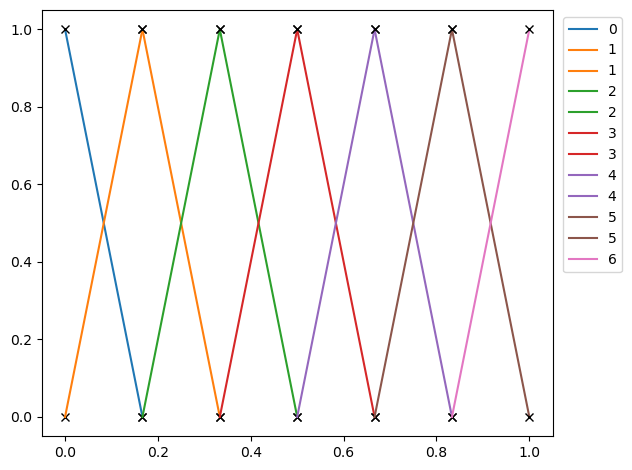

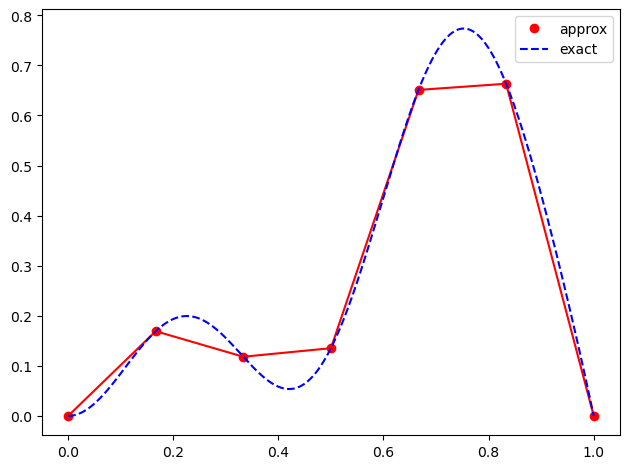

In [ ]:
    
class FEM1D:
    def __init__(self,geom, reference_element):
        self.geom = geom
        self.reference_element = reference_element
        self.degree = self.reference_element.degree
        self.N_elem = self.geom.N-1
        self.set_degrees_of_freedom()

    def set_degrees_of_freedom(self):
        # Define the points on the whole domain for all subpoints in each cell
        self.N_dofs      =  ????  # Number of total Degrees of Freedom = number of basis functions 
        self.DoFs        = np.zeros(self.N_dofs) # location of the Dofs
        self.DoFs_matrix = np.zeros((self.N_elem, self.degree+1)) # Location of the dofs but in a matrix
        self.dxs         = np.zeros(self.N_elem)    # Lengths of the cells
        self.elem2dofs   = np.zeros((self.N_elem, self.degree+1), dtype=np.int64) # maps a cell index and local dof index to global dof index
        
        for i in range(self.N_elem):
            dx = self.geom.xx[i+1]-self.geom.xx[i]
            self.dxs[i] = dx
            self.DoFs_matrix[i,:] = ???
            self.DoFs[i*self.degree:(i+1)*self.degree+1] = self.DoFs_matrix[i,:]
            self.elem2dofs[i,:] = np.arange(i*self.degree,(i+1)*self.degree+1)

    def assemble_stiffness_matrix(self):
        # assemble the matrix given by a_{ij} = \int phi_i' phi_j' = 1/h_i \int \hat{phi}_i' \hat{phi}_j'
        self.reference_element.assemble_stiffness()
        self.stiffness = np.zeros((self.N_dofs,self.N_dofs))
        for i in range(self.N_elem):
            h_i = self.dxs[i]
            for idof in range(self.degree+1):
                for jdof in range(self.degree+1):
                    self.stiffness[self.elem2dofs[i,idof],self.elem2dofs[i,jdof]]+= ??? use the reference element structure!!
            
        return self.stiffness
    
    def assemble_mass_matrix(self):
        # assemble the matrix given by a_{ij} = \int phi_i phi_j
        self.reference_element.assemble_mass()
        self.mass = np.zeros((self.N_dofs,self.N_dofs))
        for i in range(self.N_elem):
            h_i = self.dxs[i]
            for idof in range(self.degree+1):
                for jdof in range(self.degree+1):
                    self.mass[self.elem2dofs[i,idof],self.elem2dofs[i,jdof]]+= ???
            
        return self.mass
        

    
    def plot_basis_functions(self):
        colors = list(mcolors.TABLEAU_COLORS.values())
        n_col = len(colors)
        x_plot = np.linspace(self.reference_element.x_left, self.reference_element.x_right,100)
        yy = self.reference_element.eval_basis(x_plot)
        plt.figure()
        for i in range(self.N_elem):
            x_plot_phys = x_plot*self.dxs[i]+self.geom.xx[i]
            for j in range(self.degree+1):
                dof_index = self.elem2dofs[i,j]
                plt.plot(x_plot_phys,yy[j,:],color=colors[dof_index%n_col],
                         label = dof_index)
                plt.plot(self.DoFs_matrix[i,j],1., "xk")
                plt.plot(self.DoFs_matrix[i,j],0., "xk")
        plt.legend(bbox_to_anchor=(1.15, 1.0))
        plt.tight_layout()
        plt.savefig("basis_functions_N_%d_degree_%d.pdf"%(self.N_elem,self.degree))
        plt.savefig("basis_functions_N_%d_degree_%d.png"%(self.N_elem,self.degree))
    
    def plot_function(self, u_coeff, u_ex_lambda = None):
        x_plot = np.linspace(self.reference_element.x_left, self.reference_element.x_right,100)
        basis_plot = self.reference_element.eval_basis(x_plot)
        plt.figure()
        for i in range(self.N_elem):
            x_plot_phys = x_plot*self.dxs[i]+self.geom.xx[i]
            yy = np.zeros_like(x_plot)
            for j in range(self.degree+1):
                dof_index = self.elem2dofs[i,j]
                yy += u_coeff[dof_index]*basis_plot[j,:]
            plt.plot(x_plot_phys,yy,"-r")
        plt.plot(self.DoFs,u_coeff, "ro", label="approx")

        if u_ex_lambda is not None:
            x_plot = np.linspace(self.geom.x_left, self.geom.x_right, 1000)
            y_plot = u_ex_lambda(x_plot)
            plt.plot(x_plot,  y_plot, "b--", label="exact")
        plt.legend()
        plt.tight_layout()    
    
# Basis functions
reference_element = FEM1D_reference_element(1)
geom = Geometry1D(0,1,N=7)
fem1d = FEM1D(geom,reference_element)

fem1d.plot_basis_functions()

u_lambda = lambda x : (1-x)*x *(5*x**2+0.5*x+np.sin(10*x))
u_coeff = u_lambda(fem1d.DoFs)
fem1d.plot_function(u_coeff, u_lambda)
print(fem1d.assemble_mass_matrix())
print(fem1d.assemble_stiffness_matrix())
    
            

In [ ]:
class Poisson_Finite_Element_1D:
    def __init__(self,geometry, boundary, f_lambda, degree=1 ):
        self.geometry = geometry
        self.boundary = boundary
        self.f_lambda = f_lambda
        self.degree = degree
        self.define_fem()

    def define_fem(self):
        reference_element = FEM1D_reference_element(self.degree)
        self.fem1d = FEM1D(self.geometry, reference_element)

    def set_exact_solution(self, uex_lambda):
        self.uex_lambda = uex_lambda

    def assemble_matrix(self):
        self.A = self.fem1d.assemble_stiffness_matrix()
        
        self.f = self.fem1d.assemble_mass_matrix()@self.f_lambda(self.fem1d.DoFs)
        self.apply_BC()

    def apply_BC(self,boundary = None):
        if boundary is not None:
            self.boundary = boundary
        if not hasattr(self,"boundary"):
            raise ValueError("Boundaries are not set yet")
        
        if self.boundary["left"][0]=="dirichlet":
            # Dirichlet in x_left
            ???
        elif self.boundary["left"][0]=="neumann":
            # Neumann in x_left
            ???
        else:
            raise ValueError("Boundary %s not implemented"%(self.boundary["left"][0]))
            
        if self.boundary["right"][0]=="dirichlet":
            # Dirichlet in x_right
            ???
        elif self.boundary["right"][0]=="neumann":
            # Neumann in x_right
            ???

    def solve(self, N=None):
        if N is not None:
            self.geometry.set_N(N)
            self.define_fem()
            self.assemble_matrix()
        if not hasattr(self,"A") or not hasattr(self,"f"):
            self.assemble_matrix()
        self.uu = np.linalg.solve(self.A, self.f)
        if hasattr(self,"uex_lambda"):
            uex = self.uex_lambda(self.fem1d.DoFs)
            self.error = np.linalg.norm(self.uu-uex)/np.linalg.norm(uex)
        else:
            self.error = np.nan
        return self.geometry, self.uu, self.error



2.2962713507360567e-05


<Figure size 640x480 with 0 Axes>

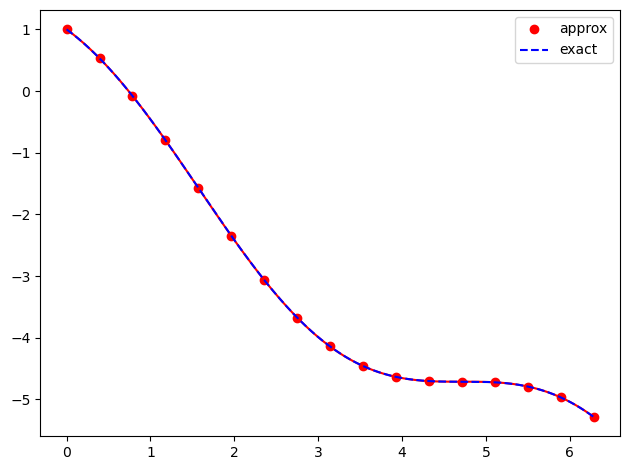

In [24]:
geom = Geometry1D(0.,2*np.pi,N=5)

boundary = dict()
boundary["left"] = ["dirichlet", 1.]
# boundary["right"] = ["dirichlet", 1.-2*np.pi]
boundary["right"] = ["neumann", -1.]

uex_lambda = lambda x: np.cos(x)-x
f_lambda = lambda x: np.cos(x)

problem = Poisson_Finite_Element_1D(geom, boundary, f_lambda, degree=4)
problem.set_exact_solution(uex_lambda)

plt.figure()
geom,uu,error = problem.solve()

problem.fem1d.plot_function(uu,uex_lambda)
# plt.plot(problem.fem1d.DoFs,uu,label="approximation")
# plt.plot(problem.fem1d.DoFs,uex_lambda(problem.fem1d.DoFs),label="exact")
# plt.legend()
print(error)

In [26]:
class ConvergenceAnalysis:
    def __init__(self, problem, Ns=None):
        self.problem = problem
        if Ns is None:
            self.Ns = np.int64(2**np.linspace(3,10,8))
        else:
            self.Ns = Ns
        self.Ns = np.array(self.Ns)
    
    def analyse(self):
        self.errors = np.zeros(len(self.Ns))
        self.orders = np.zeros(len(self.Ns)-1)
        
        for iN, N in enumerate(self.Ns):
            _,_,self.errors[iN] =self.problem.solve(N)
            if iN>0:
                self.orders[iN-1] = np.log(self.errors[iN]/self.errors[iN-1])/np.log(self.Ns[iN-1]/self.Ns[iN])
            
    def plot_error_convergence(self):
        if not hasattr(self,"errors"):
            self.analyse()
        fig, ax = plt.subplots(1,1)
        ax.loglog(self.Ns, self.errors, label ="errors")
        average_order = np.mean(self.orders)
        order_plus = np.ceil(average_order)
        order_minus = np.floor(average_order)
        ax.loglog(self.Ns, (self.Ns/self.Ns[0])**(-order_plus)*self.errors[0],"--", label =f"order {order_plus}")
        ax.loglog(self.Ns, (self.Ns/self.Ns[0])**(-order_minus)*self.errors[0],"--", label =f"order {order_minus}")
        ax.set_xlabel("Number of points in mesh")
        ax.set_ylabel("Relative error")
        plt.legend()
        
        

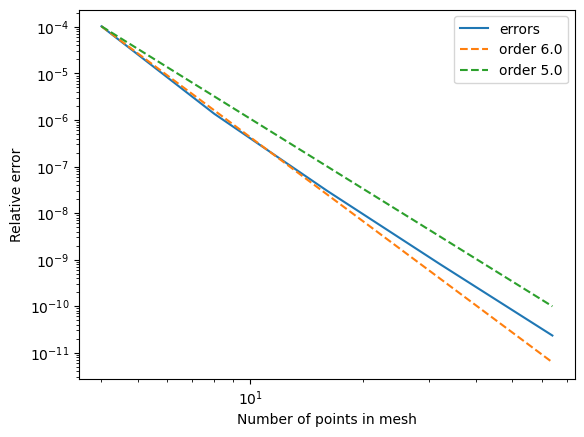

In [30]:
Ns = np.int64(2**np.linspace(2,6,5))
convergence = ConvergenceAnalysis(problem, Ns = Ns)
convergence.plot_error_convergence()

## Exercises
1. Irregular domain
2. Different problem (e.g. with reaction term)
3. Non-constant coefficient of the Laplacian term
4. Sparse implementation of the matrix